## CAPSTONE PROJECT - ACCIDENT SEVERITY

##### To predict severity of accident based on conditions so as person drives carefully or could even change coarse of destination

In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
accident_df=pd.read_csv('https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv')

In [3]:
accident_df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [4]:
accident_df.shape

(194673, 38)

In [5]:
accident_df.columns

Index(['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO',
       'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE',
       'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INCDATE',
       'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC',
       'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC',
       'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')

In [6]:
accident_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 38 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   SEVERITYCODE    194673 non-null  int64  
 1   X               189339 non-null  float64
 2   Y               189339 non-null  float64
 3   OBJECTID        194673 non-null  int64  
 4   INCKEY          194673 non-null  int64  
 5   COLDETKEY       194673 non-null  int64  
 6   REPORTNO        194673 non-null  object 
 7   STATUS          194673 non-null  object 
 8   ADDRTYPE        192747 non-null  object 
 9   INTKEY          65070 non-null   float64
 10  LOCATION        191996 non-null  object 
 11  EXCEPTRSNCODE   84811 non-null   object 
 12  EXCEPTRSNDESC   5638 non-null    object 
 13  SEVERITYCODE.1  194673 non-null  int64  
 14  SEVERITYDESC    194673 non-null  object 
 15  COLLISIONTYPE   189769 non-null  object 
 16  PERSONCOUNT     194673 non-null  int64  
 17  PEDCOUNT  

In [7]:
blank=accident_df.isnull().sum()
blank[blank>0]

X                   5334
Y                   5334
ADDRTYPE            1926
INTKEY            129603
LOCATION            2677
EXCEPTRSNCODE     109862
EXCEPTRSNDESC     189035
COLLISIONTYPE       4904
JUNCTIONTYPE        6329
INATTENTIONIND    164868
UNDERINFL           4884
WEATHER             5081
ROADCOND            5012
LIGHTCOND           5170
PEDROWNOTGRNT     190006
SDOTCOLNUM         79737
SPEEDING          185340
ST_COLCODE            18
ST_COLDESC          4904
dtype: int64

In [8]:
accident_df['SEVERITYCODE'].value_counts()

1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

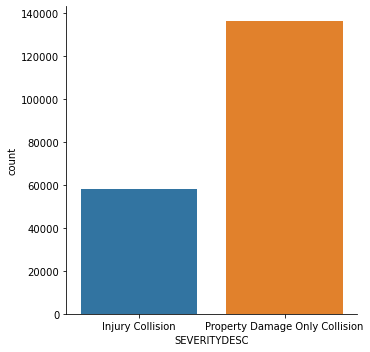

In [9]:
sns.catplot(x='SEVERITYDESC',data=accident_df,kind='count')

In [10]:
pd.pivot_table(accident_df,index=['STATUS'],columns=['SEVERITYDESC'],values='SEVERITYCODE',aggfunc='count')

SEVERITYDESC,Injury Collision,Property Damage Only Collision
STATUS,,
Matched,57159,132627
Unmatched,1029,3858


In [11]:
#Removing columns 'INTKEY','EXCEPTRSNCODE','EXCEPTRSNDESC'
columns_drop=['OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO', 'STATUS']
accident_df.drop(['INTKEY','EXCEPTRSNCODE','EXCEPTRSNDESC'],inplace=True,axis=1)

In [12]:
accident_df['INATTENTIONIND'].replace("Y",1,inplace=True)
accident_df['INATTENTIONIND'].replace(np.nan,0,inplace=True)

accident_df['PEDROWNOTGRNT'].replace("Y",1,inplace=True)
accident_df['PEDROWNOTGRNT'].replace(np.nan,0,inplace=True)

accident_df['SPEEDING'].replace("Y",1,inplace=True)
accident_df['SPEEDING'].replace(np.nan,0,inplace=True)

accident_df['UNDERINFL'].replace(["Y","1"],1,inplace=True)
accident_df['UNDERINFL'].replace(["N",np.nan,"0"],0,inplace=True)

In [13]:
accident_df['INATTENTIONIND'].value_counts()

0.0    164868
1.0     29805
Name: INATTENTIONIND, dtype: int64

In [14]:
accident_df['PEDROWNOTGRNT'].value_counts()

0.0    190006
1.0      4667
Name: PEDROWNOTGRNT, dtype: int64

In [15]:
accident_df['SPEEDING'].value_counts()

0.0    185340
1.0      9333
Name: SPEEDING, dtype: int64

In [16]:
accident_df['UNDERINFL'].value_counts()

0    185552
1      9121
Name: UNDERINFL, dtype: int64

In [17]:
accident_df['STATUS'].value_counts()

Matched      189786
Unmatched      4887
Name: STATUS, dtype: int64

In [18]:
accident_df['ADDRTYPE'].value_counts()

Block           126926
Intersection     65070
Alley              751
Name: ADDRTYPE, dtype: int64

ADDRTYPE,Alley,Block,Intersection
SEVERITYDESC,,,
Injury Collision,82,30096,27819
Property Damage Only Collision,669,96830,37251


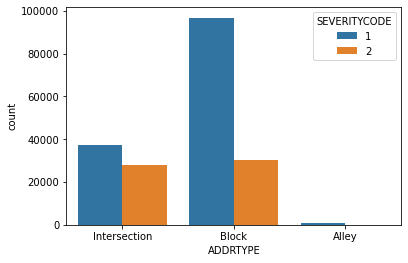

In [19]:
#Intersection more percentage of INJURY accident, block has very number of property damage accidents
sns.countplot(x='ADDRTYPE',hue='SEVERITYCODE',data=accident_df)
pd.pivot_table(accident_df,index=['SEVERITYDESC'],columns=['ADDRTYPE'],values='SEVERITYCODE',aggfunc='count')

In [20]:
accident_df['ADDRTYPE'].replace('Intersection',1,inplace=True)
accident_df['ADDRTYPE'].replace('Block',2,inplace=True)
accident_df['ADDRTYPE'].replace('Alley',0,inplace=True)

In [21]:
accident_df['COLLISIONTYPE'].value_counts()

Parked Car    47987
Angles        34674
Rear Ended    34090
Other         23703
Sideswipe     18609
Left Turn     13703
Pedestrian     6608
Cycles         5415
Right Turn     2956
Head On        2024
Name: COLLISIONTYPE, dtype: int64

<Figure size 720x720 with 0 Axes>

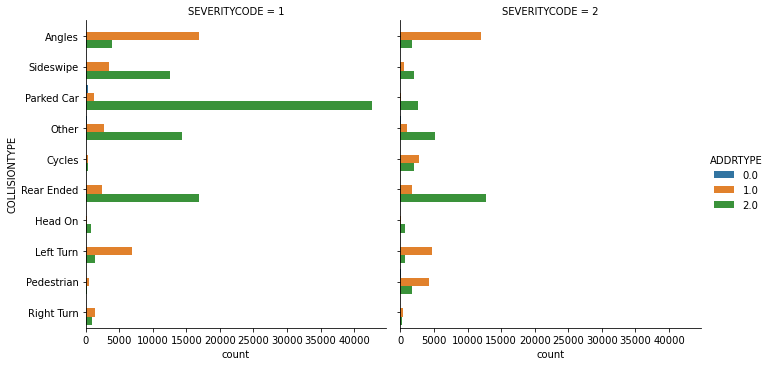

In [23]:
#Cyclist and Pedestrian have injury collisions
#Parked Car collosion with property damage mostly occur in block
#Rear ended have high number of injury collision
plt.figure(figsize=(10,10))
sns.catplot(y='COLLISIONTYPE',col='SEVERITYCODE',hue='ADDRTYPE',data=accident_df,kind='count',aspect=1)

In [24]:
accident_df['JUNCTIONTYPE'].value_counts()

Mid-Block (not related to intersection)              89800
At Intersection (intersection related)               62810
Mid-Block (but intersection related)                 22790
Driveway Junction                                    10671
At Intersection (but not related to intersection)     2098
Ramp Junction                                          166
Unknown                                                  9
Name: JUNCTIONTYPE, dtype: int64

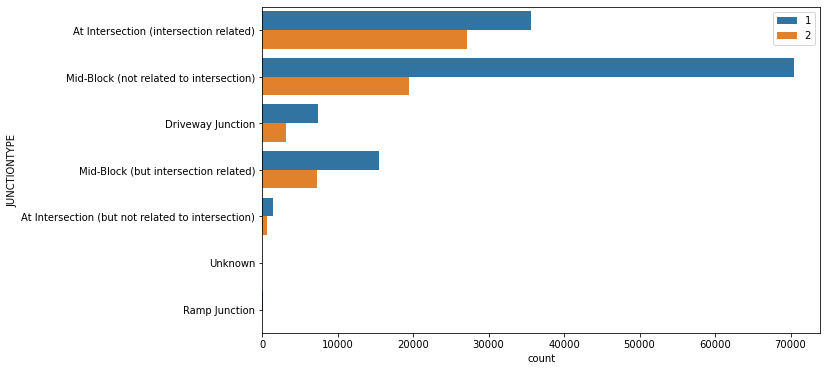

In [25]:
#At interscetion has high percentage of inguiry collision
plt.figure(figsize=(10,6))
sns.countplot(y='JUNCTIONTYPE',hue='SEVERITYCODE',data=accident_df)
plt.legend(loc='upper right')

In [26]:
accident_df['JUNCTIONTYPE'].replace('At Intersection (but not related to intersection)',1,inplace=True)
accident_df['JUNCTIONTYPE'].replace('At Intersection (intersection related)',2,inplace=True)
accident_df['JUNCTIONTYPE'].replace('Driveway Junction',3,inplace=True)
accident_df['JUNCTIONTYPE'].replace('Mid-Block (but intersection related)',4,inplace=True)
accident_df['JUNCTIONTYPE'].replace('Mid-Block (not related to intersection)',5,inplace=True)
accident_df['JUNCTIONTYPE'].replace('Ramp Junction',6,inplace=True)
accident_df['JUNCTIONTYPE'].replace('Unknown',0,inplace=True)

In [27]:
accident_df['SDOT_COLDESC'].value_counts().sort_index()

DRIVERLESS VEHICLE RAN OFF ROAD - HIT FIXED OBJECT                107
DRIVERLESS VEHICLE RAN OFF ROAD - NO COLLISION                      1
DRIVERLESS VEHICLE STRUCK MOTOR VEHICLE FRONT END AT ANGLE        104
DRIVERLESS VEHICLE STRUCK MOTOR VEHICLE LEFT SIDE AT ANGLE         53
DRIVERLESS VEHICLE STRUCK MOTOR VEHICLE LEFT SIDE SIDESWIPE         4
DRIVERLESS VEHICLE STRUCK MOTOR VEHICLE REAR END                   93
DRIVERLESS VEHICLE STRUCK MOTOR VEHICLE RIGHT SIDE AT ANGLE        12
DRIVERLESS VEHICLE STRUCK MOTOR VEHICLE RIGHT SIDE SIDESWIPE        6
DRIVERLESS VEHICLE STRUCK OBJECT IN ROADWAY                         3
DRIVERLESS VEHICLE STRUCK PEDESTRIAN                                8
MOTOR VEHCILE STRUCK PEDESTRIAN                                  6518
MOTOR VEHICLE OVERTURNED IN ROAD                                  479
MOTOR VEHICLE RAN OFF ROAD - HIT FIXED OBJECT                    8856
MOTOR VEHICLE RAN OFF ROAD - NO COLLISION                         166
MOTOR VEHICLE STRUCK

In [28]:
accident_df.groupby(['SDOT_COLCODE','SDOT_COLDESC'])['SDOT_COLCODE'].agg('count')

SDOT_COLCODE  SDOT_COLDESC                                                
0             NOT ENOUGH INFORMATION / NOT APPLICABLE                          9787
11            MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END AT ANGLE          85209
12            MOTOR VEHICLE STRUCK MOTOR VEHICLE, RIGHT SIDE AT ANGLE          1440
13            MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE AT ANGLE           5852
14            MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END                    54299
15            MOTOR VEHICLE STRUCK MOTOR VEHICLE, RIGHT SIDE SIDESWIPE         1604
16            MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE SIDESWIPE          9928
18            MOTOR VEHICLE STRUCK PEDALCYCLIST, FRONT END AT ANGLE            3104
21            MOTOR VEHICLE STRUCK PEDALCYCLIST, REAR END                       181
22            MOTOR VEHICLE STRUCK PEDALCYCLIST, RIGHT SIDE SIDESWIPE            17
23            MOTOR VEHICLE STRUCK PEDALCYCLIST, LEFT SIDE SIDESWIPE            124
2

In [29]:
#PEDACYCLIST/PEDESTRIAN face mostly Injury Collision
pd.pivot_table(accident_df,index=['SDOT_COLCODE','SDOT_COLDESC'],
               columns='SEVERITYDESC',values='SEVERITYCODE',aggfunc='count')

,SEVERITYDESC,Injury Collision,Property Damage Only Collision
SDOT_COLCODE,SDOT_COLDESC,,
0,NOT ENOUGH INFORMATION / NOT APPLICABLE,708.0,9079.0
11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END AT ANGLE",24338.0,60871.0
12,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, RIGHT SIDE AT ANGLE",27.0,1413.0
13,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE AT ANGLE",199.0,5653.0
14,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",17748.0,36551.0
15,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, RIGHT SIDE SIDESWIPE",75.0,1529.0
16,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE SIDESWIPE",692.0,9236.0
18,"MOTOR VEHICLE STRUCK PEDALCYCLIST, FRONT END AT ANGLE",2734.0,370.0
21,"MOTOR VEHICLE STRUCK PEDALCYCLIST, REAR END",140.0,41.0


In [30]:
accident_df['SDOT_COLCODE_New']=accident_df['SDOT_COLCODE'].copy()
accident_df['SDOT_COLCODE'].replace([11,12,13,14,15,16],1,inplace=True) #MOTOR VEHICLE STRUCK MOTOR VEHICLE
accident_df['SDOT_COLCODE'].replace([18,21,22,23,24],2,inplace=True)    #MOTOR VEHICLE STRUCK PEDALCYCLIST/PEDESTRIAN
accident_df['SDOT_COLCODE'].replace([25,26,27,28,29],3,inplace=True)    #MOTOR VEHICLE SELF
accident_df['SDOT_COLCODE'].replace([31,32,33,34,35,36],4,inplace=True) #DRIVERLESS VEHICLE STRUCK MOTOR 
accident_df['SDOT_COLCODE'].replace([44,46,47,48],5,inplace=True)       #DRIVERLESS VEHICLE SELF
accident_df['SDOT_COLCODE'].replace([51,52,53,54,55,56,58],6,inplace=True) #PEDALCYCLIST STRUCK
accident_df['SDOT_COLCODE'].replace([61,64,66,68,69],7,inplace=True)     #PEDALCYCLIST SELF
accident_df['SDOT_COLCODE'].replace(0,0,inplace=True)                    #NOT APPLICABLE

In [31]:
accident_df['SDOT_COLCODE'].value_counts()

1    158332
3     14344
2      9944
0      9787
6      1697
4       272
7       178
5       119
Name: SDOT_COLCODE, dtype: int64

In [32]:
#Most collisions occur in MOTOR VEHICLE CATEGORY and most inguiry occur where pedestrians are involved
pd.pivot_table(accident_df,index=['SDOT_COLCODE'],
               columns='SEVERITYDESC',values='SEVERITYCODE',aggfunc='count')

SEVERITYDESC,Injury Collision,Property Damage Only Collision
SDOT_COLCODE,,
0,708,9079
1,43079,115253
2,8836,1108
3,3872,10472
4,21,251
5,19,100
6,1481,216
7,172,6


In [33]:
accident_df['WEATHER'].value_counts()

Clear                       111135
Raining                      33145
Overcast                     27714
Unknown                      15091
Snowing                        907
Other                          832
Fog/Smog/Smoke                 569
Sleet/Hail/Freezing Rain       113
Blowing Sand/Dirt               56
Severe Crosswind                25
Partly Cloudy                    5
Name: WEATHER, dtype: int64

In [34]:
pd.pivot_table(accident_df,index='WEATHER',columns='SEVERITYDESC',values='SEVERITYCODE',aggfunc='count')

SEVERITYDESC,Injury Collision,Property Damage Only Collision
WEATHER,,
Blowing Sand/Dirt,15,41
Clear,35840,75295
Fog/Smog/Smoke,187,382
Other,116,716
Overcast,8745,18969
Partly Cloudy,3,2
Raining,11176,21969
Severe Crosswind,7,18
Sleet/Hail/Freezing Rain,28,85


In [35]:
accident_df['WEATHER_New']=accident_df['WEATHER'].copy()
accident_df.replace('Clear',0,inplace=True)
accident_df.replace(['Raining','Sleet/Hail/Freezing Rain','Snowing'],1,inplace=True)
accident_df.replace(['Blowing Sand/Dirt','Fog/Smog/Smoke','Severe Crosswind'],2,inplace=True)
accident_df.replace(['Overcast','Partly Cloudy'],3,inplace=True)
accident_df.replace(['Unknown','Other'],4,inplace=True)

In [36]:
accident_df['WEATHER'].value_counts()

0.0    111135
1.0     34165
3.0     27719
4.0     15923
2.0       650
Name: WEATHER, dtype: int64

In [37]:
#Most collisions occur on clear weather day
pd.pivot_table(accident_df,index='WEATHER',columns='SEVERITYDESC',values='SEVERITYCODE',aggfunc='count')

SEVERITYDESC,Injury Collision,Property Damage Only Collision
WEATHER,,
0.0,35840,75295
1.0,11375,22790
2.0,209,441
3.0,8748,18971
4.0,932,14991


In [38]:
accident_df['ROADCOND'].value_counts()

Dry               124510
Wet                47474
4                  15210
Ice                 1209
Snow/Slush          1004
Standing Water       115
Sand/Mud/Dirt         75
Oil                   64
Name: ROADCOND, dtype: int64

In [39]:
accident_df['ROADCOND_New']=accident_df['ROADCOND'].copy()
accident_df['ROADCOND'].replace(['Dry'],0,inplace=True)                          #Dry
accident_df['ROADCOND'].replace(4,4,inplace=True)                                #Other 
accident_df['ROADCOND'].replace(['Wet','Ice','Standing Water','Oil'],2,inplace=True)   #Wet
accident_df['ROADCOND'].replace(['Snow/Slush','Sand/Mud/Dirt'],3,inplace=True)   #Mushy

In [40]:
accident_df['ROADCOND'].value_counts()

0.0    124510
2.0     48862
4.0     15210
3.0      1079
Name: ROADCOND, dtype: int64

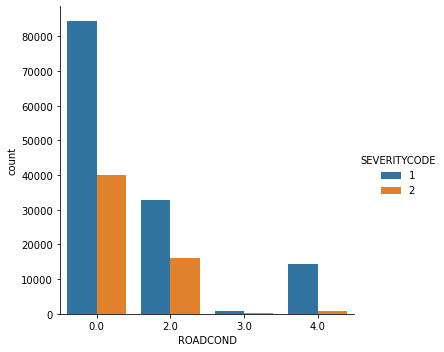

In [41]:
#Most Collisions occur in Dry Road Condition
sns.catplot(x='ROADCOND',hue='SEVERITYCODE',data=accident_df,kind='count')

In [42]:
accident_df['LIGHTCOND'].value_counts()

Daylight                    116137
Dark - Street Lights On      48507
4                            13708
Dusk                          5902
Dawn                          2502
Dark - No Street Lights       1537
Dark - Street Lights Off      1199
Dark - Unknown Lighting         11
Name: LIGHTCOND, dtype: int64

In [43]:
accident_df['LIGHTCOND'].replace(['Dark - Street Lights On','Dusk','Dawn'],1,inplace=True)
accident_df['LIGHTCOND'].replace(['Dark - No Street Lights','Dark - Street Lights Off','Dark - Unknown Lighting'],
                                 2,inplace=True)
accident_df['LIGHTCOND'].replace('Daylight',0,inplace=True)
accident_df['LIGHTCOND'].replace(4,4,inplace=True)

In [44]:
#Most accidents take in Daylight
pd.pivot_table(accident_df,index='LIGHTCOND',columns='SEVERITYDESC',values='SEVERITYCODE',aggfunc='count')

SEVERITYDESC,Injury Collision,Property Damage Only Collision
LIGHTCOND,,
0.0,38544,77593
1.0,17243,39668
2.0,654,2093
4.0,657,13051


In [45]:
accident_df.INCDTTM=pd.to_datetime(accident_df.INCDTTM)

In [46]:
import datetime
accident_df['year']=pd.DatetimeIndex(accident_df['INCDTTM']).year
accident_df['month']=pd.DatetimeIndex(accident_df['INCDTTM']).month
accident_df['day']=pd.DatetimeIndex(accident_df['INCDTTM']).day
accident_df['weekday']=pd.DatetimeIndex(accident_df['INCDTTM']).dayofweek
accident_df['hour']=pd.DatetimeIndex(accident_df['INCDTTM']).hour

In [47]:
accident_df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,LOCATION,...,CROSSWALKKEY,HITPARKEDCAR,SDOT_COLCODE_New,WEATHER_New,ROADCOND_New,year,month,day,weekday,hour
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,1.0,5TH AVE NE AND NE 103RD ST,...,0,N,11,3.0,Wet,2013,3,27,2,14
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,2.0,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,...,0,N,16,1.0,Wet,2006,12,20,2,18
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,2.0,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,...,0,N,14,3.0,Dry,2004,11,18,3,10
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,2.0,2ND AVE BETWEEN MARION ST AND MADISON ST,...,0,N,11,0.0,Dry,2013,3,29,4,9
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,1.0,SWIFT AVE S AND SWIFT AV OFF RP,...,0,N,11,1.0,Wet,2004,1,28,2,8


In [48]:
pd.pivot_table(accident_df,index='year',columns='SEVERITYDESC',values='SEVERITYCODE',aggfunc='count')

SEVERITYDESC,Injury Collision,Property Damage Only Collision
year,,
2004,3647,8218
2005,4450,10665
2006,4350,10838
2007,4017,10439
2008,3767,9893
2009,3378,8356
2010,3245,7563
2011,3099,7820
2012,3467,7440


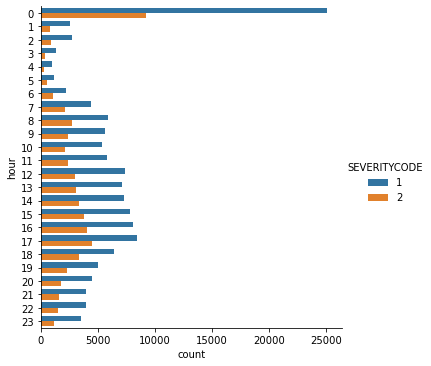

In [49]:
sns.catplot(y='hour',data=accident_df,hue='SEVERITYCODE',kind='count')

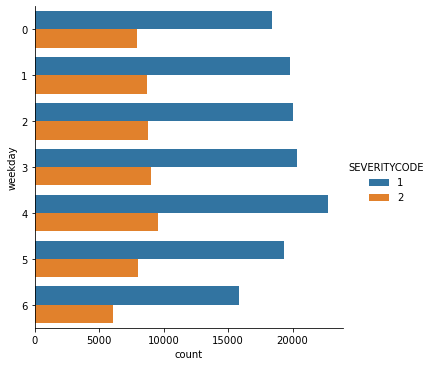

In [50]:
sns.catplot(y='weekday',data=accident_df,hue='SEVERITYCODE',kind='count')

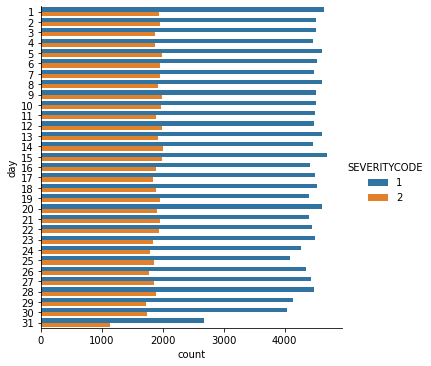

In [51]:
sns.catplot(y='day',data=accident_df,hue='SEVERITYCODE',kind='count')

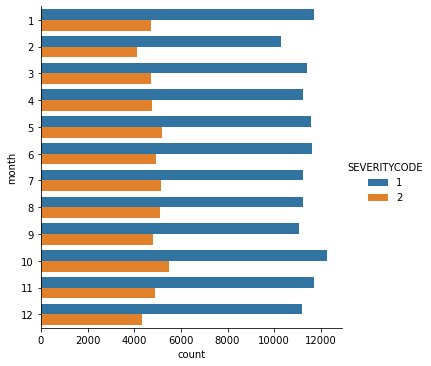

In [52]:
sns.catplot(y='month',data=accident_df,hue='SEVERITYCODE',kind='count')

In [53]:
accident_df[['PERSONCOUNT','PEDCOUNT','PEDCYLCOUNT','VEHCOUNT']].describe()

,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT
count,194673.000000,194673.000000,194673.000000,194673.000000
mean,2.444427,0.037139,0.028391,1.920780
std,1.345929,0.198150,0.167413,0.631047
min,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,2.000000
50%,2.000000,0.000000,0.000000,2.000000
75%,3.000000,0.000000,0.000000,2.000000
max,81.000000,6.000000,2.000000,12.000000


0       5544
1      13154
2     114231
3      35553
4      14660
5       6584
6       2702
7       1131
8        533
9        216
10       128
11        56
12        33
13        21
14        19
15        11
16         8
17        11
18         6
19         5
20         6
21         2
22         4
23         2
24         2
25         6
26         4
27         3
28         3
29         3
30         2
31         1
32         3
34         3
35         1
36         2
37         3
39         1
41         1
43         1
44         6
47         3
48         1
53         1
54         1
57         1
81         1
Name: PERSONCOUNT, dtype: int64


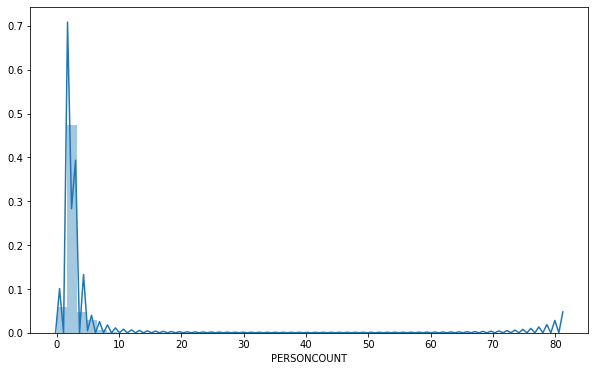

In [54]:
#data is skewed, and mostly involved number of people in collision are 2
plt.figure(figsize=(10,6))
sns.distplot(accident_df['PERSONCOUNT'])
print(accident_df['PERSONCOUNT'].value_counts().sort_index())

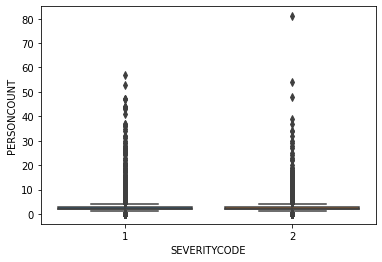

In [55]:
#There are outliers in PERSONCOUNT
sns.boxplot(y='PERSONCOUNT',x='SEVERITYCODE',data=accident_df)

In [56]:
accident_df.groupby(['SEVERITYCODE'])['PERSONCOUNT','PEDCOUNT','PEDCYLCOUNT','VEHCOUNT'].agg('mean')

,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT
SEVERITYCODE,,,,
1,2.329348,0.005268,0.004975,1.943312
2,2.714357,0.111896,0.083316,1.867928


In [57]:
accident_df['SEVERITYCODE'].replace(1,0,inplace=True)
accident_df['SEVERITYCODE'].replace(2,1,inplace=True)

In [58]:
#Feature Selection
columns=['ADDRTYPE','JUNCTIONTYPE','INATTENTIONIND','UNDERINFL','WEATHER','ROADCOND','LIGHTCOND',
         'PEDROWNOTGRNT','SDOT_COLCODE','SPEEDING','SEVERITYCODE']
columns_map=['ADDRTYPE','JUNCTIONTYPE','INATTENTIONIND','UNDERINFL','WEATHER','ROADCOND','LIGHTCOND',
         'PEDROWNOTGRNT','SDOT_COLCODE','SPEEDING','SEVERITYCODE','X','Y']

In [59]:
accident_df_final=accident_df[columns]

In [60]:
blank_row=accident_df_final.isnull().sum(axis=1)
accident_df_final=accident_df_final[blank_row==0]
accident_df_final.shape

(182914, 11)

In [61]:
accident_df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182914 entries, 0 to 194672
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   ADDRTYPE        182914 non-null  float64
 1   JUNCTIONTYPE    182914 non-null  float64
 2   INATTENTIONIND  182914 non-null  float64
 3   UNDERINFL       182914 non-null  int64  
 4   WEATHER         182914 non-null  float64
 5   ROADCOND        182914 non-null  float64
 6   LIGHTCOND       182914 non-null  float64
 7   PEDROWNOTGRNT   182914 non-null  float64
 8   SDOT_COLCODE    182914 non-null  int64  
 9   SPEEDING        182914 non-null  float64
 10  SEVERITYCODE    182914 non-null  int64  
dtypes: float64(8), int64(3)
memory usage: 16.7 MB


In [ ]:
import folium
import webbrowser
from folium import plugins

In [ ]:
#Folium Map
# let's start again with a clean copy of the map
seattle_map = folium.Map(location=[47.61536892, -122.3302243], zoom_start=10)

In [ ]:
# instantiate a mark cluster object for the incidents in the dataframe
incidents = plugins.MarkerCluster().add_to(seattle_map)
accident_location=accident_df[~accident_df['X'].isnull()]


# loop through the dataframe and add each data point to the mark cluster
for lat, lng, label, in zip(accident_location.Y, accident_location.X, accident_location.SEVERITYCODE):
    folium.Marker(
    location=[lat, lng],
    icon=None,
    ).add_to(incidents)

seattle_map.add_child(incidents)

In [ ]:
#most variables correlation seem fine
plt.figure(figsize=(20,15))
sns.heatmap(accident_df.corr(),cmap='YlGnBu',annot=True)

In [ ]:
sns.pairplot(accident_df,diag_kind='kde')

In [ ]:
columns=[]

In [ ]:
blank_row=accident_df.isnull().sum(axis=1)
blank_row.value_counts().sort_index()

In [ ]:
accident_df.shape